# 3. Assignment

## Portfolio Management
### MLP Training

#### January 2025

Questions?
* Contact: Mark Hendricks
* hendricks@uchicago.edu

***

# 1. Mean-Variance Optimization

### Data
You will need the file in the github repo, `data/multi_asset_etf_data.xlsx`.
- The time-series data gives monthly returns for the 11 asset classes and a short-term Treasury-bill fund return, ("SHV",) which we consider as the risk-free rate.
- The data is provided in total returns, (in which case you should ignore the SHV column,) as well as excess returns, (where SHV has been subtracted from the other columns.)

### Model
We are going to analyze the problem in terms of **excess** returns.
- Be sure to use the`excess returns` tab of the data.

### Format
In the questions below, **annualize the statistics** you report, noting it is monthly data.

In [2]:
import numpy as np
import pandas as pd

path = '../data/multi_asset_etf_data.xlsx'
xret_df = pd.read_excel(path, 'excess returns').set_index('Date')
price_df = pd.read_excel(path, 'prices').set_index('Date')
totret_df = pd.read_excel(path, 'total returns').set_index('Date')

display(xret_df.head())
display(price_df.head())
display(totret_df.head())

SCALE = 12

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2015-02-28,-0.011015,0.044071,0.043898,0.063196,0.022130,-0.024898,-0.026157,0.063921,0.033956,0.056023,-0.013067
2015-03-31,-0.013831,-0.060448,-0.014882,-0.014195,-0.009387,0.008652,0.010836,-0.010363,-0.001576,-0.015615,-0.004728
2015-04-30,0.019488,0.071380,0.068436,0.036375,0.008623,-0.006421,-0.048251,0.053891,0.001913,0.009743,0.006688
2015-05-31,-0.032312,-0.031711,-0.041045,0.001955,0.003555,-0.004164,-0.003311,0.026868,-0.000333,0.012856,-0.010056
2015-06-30,-0.007532,0.016284,-0.029399,-0.031273,-0.018962,-0.016400,-0.044070,-0.019244,-0.013762,-0.020402,-0.010337


,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SHV,SPY,TIP
Date,,,,,,,,,,,,
2015-01-31,24.789871,15.205714,31.288193,45.824959,53.610416,90.744255,58.977341,29.480389,25.040636,93.556313,167.568741,89.879349
2015-02-28,24.521303,15.878611,32.667366,48.729248,54.806553,88.501328,57.445370,31.370153,25.895470,93.573288,176.986847,88.721176
2015-03-31,24.179916,14.917331,32.178249,48.033123,54.287090,89.258972,58.062641,31.042225,25.852297,93.564774,174.207169,88.293663
2015-04-30,24.653324,15.983480,34.383327,49.784679,54.760128,88.694000,55.266369,32.717941,25.904106,93.573288,175.920349,88.892181
2015-05-31,23.856731,15.476623,32.972065,49.881989,54.954777,88.324692,55.083366,33.597023,25.895470,93.573288,178.181976,87.998283


,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SHV,SPY,TIP
Date,,,,,,,,,,,,
2015-02-28,-0.010834,0.044253,0.044080,0.063378,0.022312,-0.024717,-0.025976,0.064102,0.034138,0.000181,0.056204,-0.012886
2015-03-31,-0.013922,-0.060539,-0.014973,-0.014286,-0.009478,0.008561,0.010745,-0.010454,-0.001667,-0.000091,-0.015706,-0.004819
2015-04-30,0.019579,0.071471,0.068527,0.036466,0.008714,-0.006330,-0.048160,0.053982,0.002004,0.000091,0.009834,0.006779
2015-05-31,-0.032312,-0.031711,-0.041045,0.001955,0.003555,-0.004164,-0.003311,0.026868,-0.000333,0.000000,0.012856,-0.010056
2015-06-30,-0.007442,0.016375,-0.029309,-0.031182,-0.018871,-0.016309,-0.043979,-0.019153,-0.013671,0.000091,-0.020312,-0.010246


### 1. Summary Statistics
* Calculate and display the mean and volatility of each asset’s excess return.
* Which assets have the best and worst Sharpe ratios?

# Mean


In [3]:
mean_xret = xret_df.mean() * SCALE
mean_xret.name = 'Mean Excess Return'
display(mean_xret)

BWX   -0.027044
DBC    0.031525
EEM    0.027967
EFA    0.045770
HYG    0.025270
IEF   -0.012205
IYR    0.044846
PSP    0.091640
QAI    0.007708
SPY    0.122538
TIP    0.002133
Name: Mean Excess Return, dtype: float64


# Vol

In [4]:
vol = xret_df.std() * np.sqrt(SCALE)
vol.name = 'Vol'
display(vol)

BWX    0.087950
DBC    0.168289
EEM    0.172594
EFA    0.152762
HYG    0.076912
IEF    0.064897
IYR    0.178480
PSP    0.223924
QAI    0.051882
SPY    0.153169
TIP    0.050171
Name: Vol, dtype: float64

# Sharpe Ratio

In [5]:
sharpe_ratio = mean_xret / vol
sharpe_ratio.name = 'Sharpe Ratio'
display(sharpe_ratio)

BWX   -0.307498
DBC    0.187327
EEM    0.162038
EFA    0.299613
HYG    0.328557
IEF   -0.188068
IYR    0.251269
PSP    0.409244
QAI    0.148576
SPY    0.800018
TIP    0.042512
Name: Sharpe Ratio, dtype: float64

Best Sharpe Ratio is clearly SPY at 0.8, the worst sharpe ratio is BWX.

### 2. Descriptive Analysis
* Calculate the correlation matrix of the returns. Which pair has the highest correlation? And the lowest?
* How well have TIPS done in our sample? Have they outperformed domestic bonds? Foreign bonds?

<Axes: >

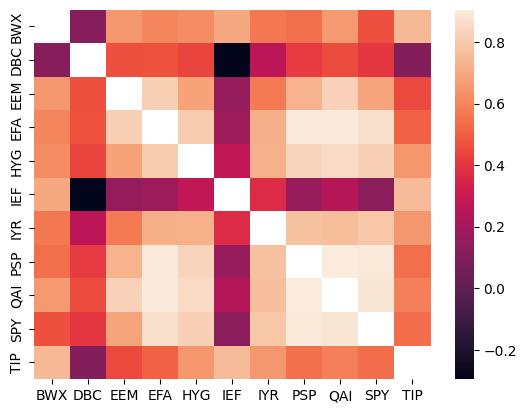

In [6]:
import seaborn as sns

corr = xret_df.corr()
corr[corr == 1.0] = np.nan
sns.heatmap(corr)

In [7]:
corr_pairs = corr.unstack().dropna()
max_pair, min_pair = corr_pairs.idxmax(), corr_pairs.idxmin()
max_pair, min_pair

(('PSP', 'QAI'), ('DBC', 'IEF'))

### 3. The MV frontier.
* Compute and display the weights of the mean-variance optimal (tangency) portfolio.
* Does the ranking of weights align with the ranking of Sharpe ratios?
* Compute the mean, volatility, and Sharpe ratio for the tangency portfolio.

In [8]:
clean_xret_df = xret_df.dropna()
scale_cov = 1

covmat = clean_xret_df.cov()
var = np.diag(np.diag(covmat))
covmat = scale_cov * covmat + (1 - scale_cov) * var

tan_weights = np.linalg.solve(covmat, clean_xret_df.mean())
tan_weights = tan_weights / tan_weights.sum()

tan_weights = pd.DataFrame(tan_weights, index=clean_xret_df.columns, columns=['tangency weight']).sort_values(by='tangency weight')
if clean_xret_df.dot(tan_weights).sum().item() != 1:
    tan_weights = -tan_weights

<BarContainer object of 11 artists>

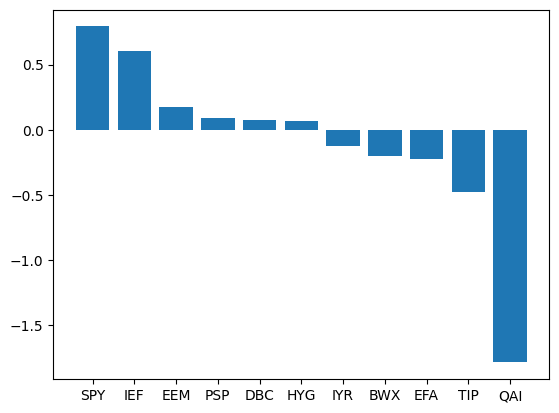

In [9]:
import matplotlib.pyplot as plt

plt.bar(tan_weights.index, tan_weights['tangency weight'].to_list())

In [10]:
tan_weights

,tangency weight
SPY,0.791391
IEF,0.605326
EEM,0.174452
PSP,0.089959
DBC,0.074523
HYG,0.069143
IYR,-0.122423
BWX,-0.201433
EFA,-0.222207
TIP,-0.475295


In [11]:
sharpe_ratio = mean_xret / vol
sharpe_ratio.sort_values()

BWX   -0.307498
IEF   -0.188068
TIP    0.042512
QAI    0.148576
EEM    0.162038
DBC    0.187327
IYR    0.251269
EFA    0.299613
HYG    0.328557
PSP    0.409244
SPY    0.800018
dtype: float64

Text(0, 0.5, 'sharpe ratio')

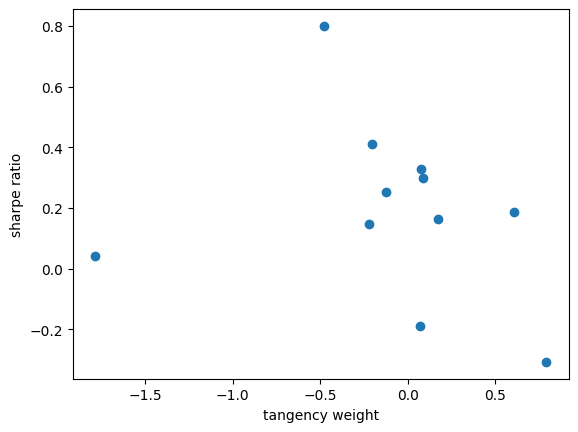

In [12]:
plt.scatter(tan_weights, sharpe_ratio)
plt.xlabel('tangency weight')
plt.ylabel('sharpe ratio')

Clearly there is no relationship between tangency weight and sharpe ratio.

# Tan Portfolio Statistics

In [14]:
xret_df

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2015-02-28,-0.011015,0.044071,0.043898,0.063196,0.022130,-0.024898,-0.026157,0.063921,0.033956,0.056023,-0.013067
2015-03-31,-0.013831,-0.060448,-0.014882,-0.014195,-0.009387,0.008652,0.010836,-0.010363,-0.001576,-0.015615,-0.004728
2015-04-30,0.019488,0.071380,0.068436,0.036375,0.008623,-0.006421,-0.048251,0.053891,0.001913,0.009743,0.006688
2015-05-31,-0.032312,-0.031711,-0.041045,0.001955,0.003555,-0.004164,-0.003311,0.026868,-0.000333,0.012856,-0.010056
2015-06-30,-0.007532,0.016284,-0.029399,-0.031273,-0.018962,-0.016400,-0.044070,-0.019244,-0.013762,-0.020402,-0.010337
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.025540,-0.025794,0.004799,0.027624,0.010494,0.008478,0.049029,-0.003754,0.002669,0.018386,0.003011
2024-09-30,0.018898,0.002651,0.052827,0.003247,0.012385,0.009239,0.026045,0.047032,0.009962,0.016419,0.010390
2024-10-31,-0.052073,0.010793,-0.034322,-0.056308,-0.013212,-0.037450,-0.038523,-0.017355,-0.009499,-0.012500,-0.022045


In [15]:
tan_weights

,tangency weight
SPY,0.791391
IEF,0.605326
EEM,0.174452
PSP,0.089959
DBC,0.074523
HYG,0.069143
IYR,-0.122423
BWX,-0.201433
EFA,-0.222207
TIP,-0.475295


In [13]:
port_dly_xret = xret_df.dot(tan_weights).rename(columns={'tangency weight':'portfolio return'})

# mean
port_mean_xret = port_dly_xret.mean() * SCALE 
port_mean_xret.name = 'Mean Xret'
display(port_mean_xret)

# vol
port_vol = port_dly_xret.std() * np.sqrt(SCALE) 
port_vol.name = 'Vol'
display(port_vol)

# sharpe
port_sharpe_ratio = (port_mean_xret / port_vol).rename('Sharpe Ratio')
display(port_sharpe_ratio)

portfolio return    0.081833
Name: Mean Xret, dtype: float64

portfolio return    0.050121
Name: Vol, dtype: float64

portfolio return    1.632714
Name: Sharpe Ratio, dtype: float64

### 4. TIPS
Assess how much the tangency portfolio (and performance) change if...
* TIPS are dropped completely from the investment set.
* The expected excess monthly return to TIPS is adjusted to be `0.0012` higher than what the historic sample shows.

# Without TIPS

In [61]:
xret_ex_tips = xret_df.drop('TIP', axis=1)
clean_xret_df = xret_ex_tips.dropna()
scale_cov = 1

covmat = clean_xret_df.cov()
var = np.diag(np.diag(covmat))
covmat = scale_cov * covmat + (1 - scale_cov) * var

tan_weights = np.linalg.solve(covmat, clean_xret_df.mean())
tan_weights = tan_weights / tan_weights.sum()

tan_weights = pd.DataFrame(tan_weights, index=clean_xret_df.columns, columns=['tangency weight']).sort_values(by='tangency weight')
if clean_xret_df.dot(tan_weights).sum().item() != 1:
    tan_weights = -tan_weights

display(tan_weights)

,tangency weight
SPY,0.877330
IEF,0.426192
EEM,0.200523
PSP,0.083367
DBC,0.058999
HYG,0.009447
IYR,-0.157013
EFA,-0.211726
BWX,-0.272248
QAI,-2.014872


<BarContainer object of 10 artists>

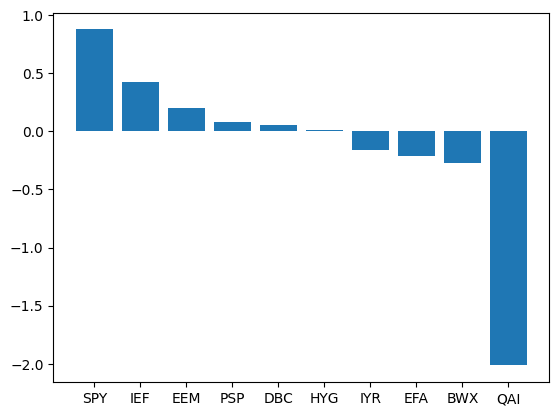

In [62]:
import matplotlib.pyplot as plt

plt.bar(tan_weights.index, tan_weights['tangency weight'].to_list())

In [63]:
port_dly_xret = xret_ex_tips.dot(tan_weights).rename(columns={'tangency weight':'portfolio return'})

# mean
port_mean_xret = port_dly_xret.mean() * SCALE 
port_mean_xret.name = 'Mean Xret'
display(port_mean_xret)

# vol
port_vol = port_dly_xret.std() * np.sqrt(SCALE) 
port_vol.name = 'Vol'
display(port_vol)

# sharpe
port_sharpe_ratio = (port_mean_xret / port_vol).rename('Sharpe Ratio')
display(port_sharpe_ratio)

portfolio return    0.09275
Name: Mean Xret, dtype: float64

portfolio return    0.057974
Name: Vol, dtype: float64

portfolio return    1.59987
Name: Sharpe Ratio, dtype: float64

# Adjusted TIPS

In [65]:
xret_adj_tips = xret_df.copy()
xret_adj_tips['TIP'] = xret_adj_tips['TIP'] + 0.0012
clean_xret_df = xret_adj_tips.dropna()
scale_cov = 1

covmat = clean_xret_df.cov()
var = np.diag(np.diag(covmat))
covmat = scale_cov * covmat + (1 - scale_cov) * var

tan_weights = np.linalg.solve(covmat, clean_xret_df.mean())
tan_weights = tan_weights / tan_weights.sum()

tan_weights = pd.DataFrame(tan_weights, index=clean_xret_df.columns, columns=['tangency weight']).sort_values(by='tangency weight')
if clean_xret_df.dot(tan_weights).sum().item() != 1:
    tan_weights = -tan_weights

tan_weights

,tangency weight
SPY,1.016540
TIP,0.769918
EEM,0.242755
IEF,0.136018
PSP,0.072688
DBC,0.033852
HYG,-0.087253
EFA,-0.194747
IYR,-0.213044
BWX,-0.386958


In [66]:
port_dly_xret = xret_adj_tips.dot(tan_weights).rename(columns={'tangency weight':'portfolio return'})

# mean
port_mean_xret = port_dly_xret.mean() * SCALE 
port_mean_xret.name = 'Mean Xret'
display(port_mean_xret)

# vol
port_vol = port_dly_xret.std() * np.sqrt(SCALE) 
port_vol.name = 'Vol'
display(port_vol)

# sharpe
port_sharpe_ratio = (port_mean_xret / port_vol).rename('Sharpe Ratio')
display(port_sharpe_ratio)

portfolio return    0.121522
Name: Mean Xret, dtype: float64

portfolio return    0.07412
Name: Vol, dtype: float64

portfolio return    1.639523
Name: Sharpe Ratio, dtype: float64

### 5. Bounds

Classically, allocators placed bounds on the portfolio rather than implementing whatever numbers come out of the Mean-Variance optimization problem.

What are the pros and cons of using these extra constraints?

Pros:
- We can "stabilize" the optmization and attempt to control the optimizer by disregarding irrealistic/undesireale outcomes

Cons:
- Our solution is extremely reliant and sensitive to the constraints we place on our problem.

***